## Text EDA and Feature Engineering
#### A. Pakage importing and Data Loading

#### B.General Statistics
    i) Review Lenght
    
    ii) Reviews Word Lenght
    
    iii) Reviews average word lenght
    
#### C. EDA
    i) Plotting Top words occurence in both labels/classes.
    
    ii) Bi-gram Exploration
    
    iii) Tri-gram Exploration

#### D. Topic Modeling
    i) Understanding specific topics present accorss corpus 
    
    ii) Visualizing Top words among given topics in an interative environment using (pyLDAvis)
    
#### E. NER
    i) Understanding overall Named entities across corpus
    
    ii) Deeper look in different Named entities present in both labels/classes
    
#### F. WordCloud
    i) Visualizing and presenting the text across labels using eye catching plots.
    
#### G. Finding characteristic terms and assocations
    i) Finding such terms that could helps us to distinguish between labels/classes 

#### H. Feature Engineering
    i) Topic Modeling for feature Extraction
    
    ii) Combining multiple features

#### I. Pickling

## A. Package importing and Data Loading

In [2]:
import pandas as pd
import numpy as np
import datetime
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("max_columns",100)
pd.set_option('display.width',1000)
pd.set_option('max_colwidth', 1000) 
nlp = spacy.load('en_core_web_sm')
import nltk
from nltk.corpus import stopwords
stpwrds = set(stopwords.words('english'))
stpwrds.discard('not')
stpwrds.discard('no')
sns.set(color_codes = True)
import os
from warnings import filterwarnings
filterwarnings('ignore')

<IPython.core.display.Javascript object>

In [3]:
PICKLE_TRAIN_DIR = os.path.join("C:/BEPEC Python Material/NLP project", "processed_data", "clean_data.pkl")

In [4]:
df = pd.read_pickle(PICKLE_TRAIN_DIR)
df.head()

,Lead Name,Location,Status,Status information,Clean_text
0,raja,hyderabad,0,"14/8/prema: share me details, available in evng 18/8/prema: postponed the plans for training currently 9/11/prema: not interested now",prema share I detail available eng prema postpone plan train currently prema not interested now
1,anirudh reddy,pune,0,"14/8/prema: cal me tmrw, shared details to email 16/8/prema: share details to email, will check n revert 18/8/prema: received your email, i'm looking for ASQ certification",prema cal I try share detail email prema share detail email will check i revert prema receive email I look as certification
2,sapna dewani,bangalore,1,16|AuG|moHan:rnr,aug mohan rne
3,suresh,mumbai,0,14/8/17(Surendra):i want only Server 16|AuG|moHan:cal busy 17|AuG|moHan:reg for server,surendra I want server aug mohan cal busy aug mohan reg server
4,akshay shinde,hyderabad,0,"14/8/prema:rnr 16/8/prema: gave info, he said he will revert in 1hr 30/8/prema: planning for next month, share details",prema rne prema give info he say he will revert he prema plan next month share detail


## B. General Statistics

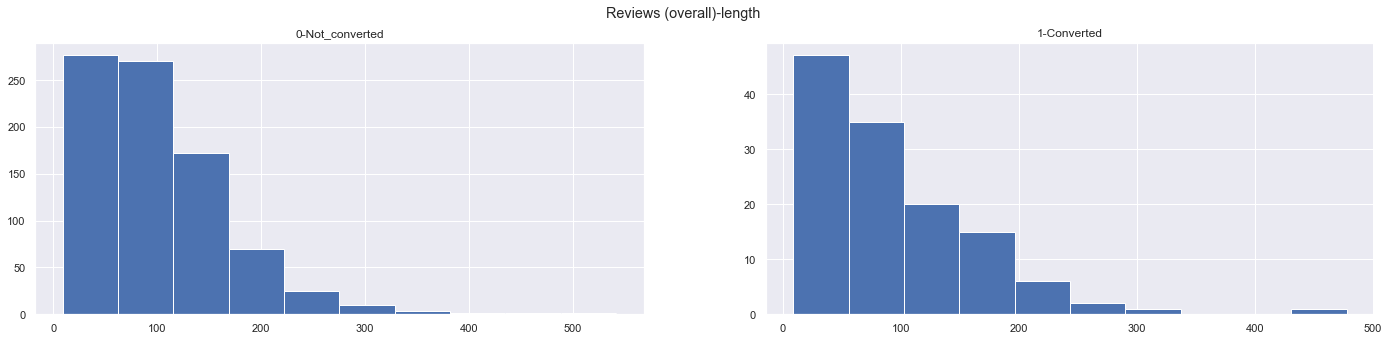

In [5]:
                                                ## Review lenght

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(24,5))
tweet_len = df[df['Status '] == int(0)]['Clean_text'].apply(lambda x : len(x))
ax1.hist(tweet_len )
ax1.set_title('0-Not_converted')

tweet_len = df[df['Status '] == int(1)]['Clean_text'].apply(lambda x : len(x))
ax2.hist(tweet_len)
ax2.set_title('1-Converted')

fig.suptitle('Reviews (overall)-length')
plt.show()

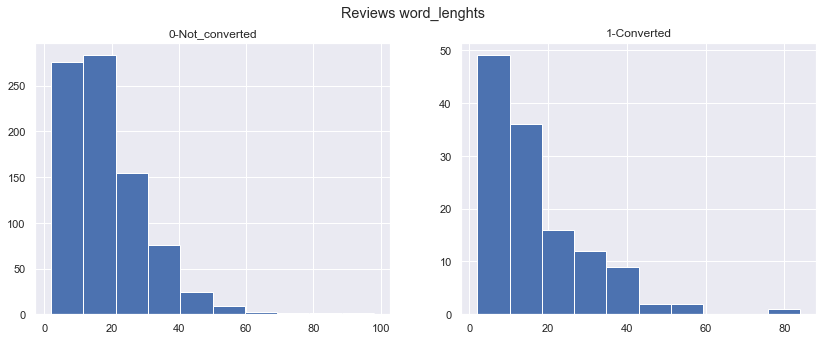

In [6]:
                                            ## Word lenght in reviews

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,5))
tweet_len = df[df['Status '] == int(0)]['Clean_text'].apply(lambda x : x.split()).apply(len)
ax1.hist(tweet_len )
ax1.set_title('0-Not_converted')

tweet_len = df[df['Status '] == int(1)]['Clean_text'].apply(lambda x : x.split()).apply(len)
ax2.hist(tweet_len)
ax2.set_title('1-Converted')

fig.suptitle('Reviews word_lenghts')
plt.show()

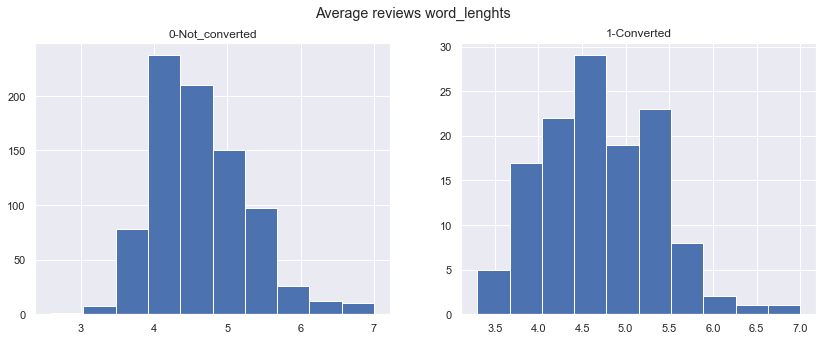

In [7]:
                                            ## Average Word lenght in reviews

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,5))
tweet_len = df[df['Status '] == int(0)]['Clean_text'].apply(lambda x:[len(i) for i in x.split()]).apply(lambda x : np.mean(x))
ax1.hist(tweet_len )
ax1.set_title('0-Not_converted')

tweet_len = df[df['Status '] == int(1)]['Clean_text'].apply(lambda x:[len(i) for i in x.split()]).apply(lambda x : np.mean(x))
ax2.hist(tweet_len)
ax2.set_title('1-Converted')

fig.suptitle('Average reviews word_lenghts')
plt.show()

## C. EDA

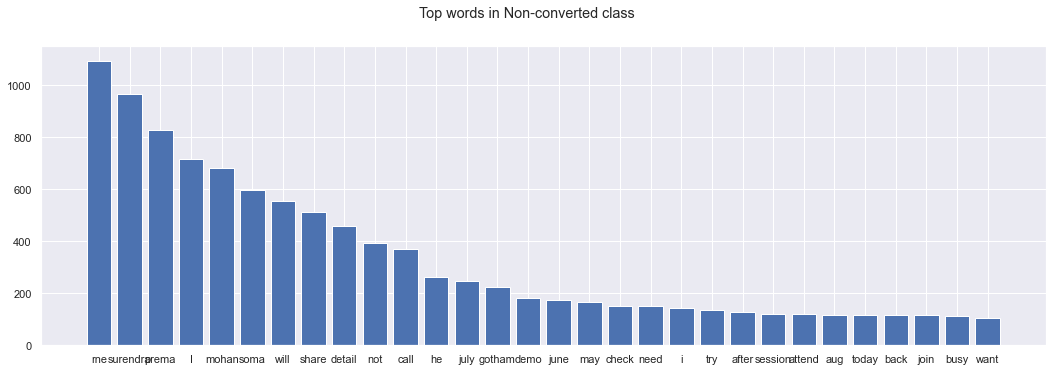

In [8]:
                            ## plotting Top Words for non-converted class

import numbers
corpus = df[df['Status '] == int(0)]['Clean_text'].str.split()
corpus = corpus.values.tolist()
corpus = [word for i in corpus for word in i]
corpus
words , count = [] , []
from collections import Counter
total = Counter(corpus)
top  = total.most_common()
for i,j in top[:30]:
    try:
        if isinstance(int(i), (numbers.Integral, np.integer)):
            pass
    except:
        words.append(i)
        count.append(j)    

fig,(ax1)=plt.subplots(1,1,figsize=(18,5.5))
ax1.bar(words , count )
fig.suptitle('Top words in Non-converted class')
plt.show()

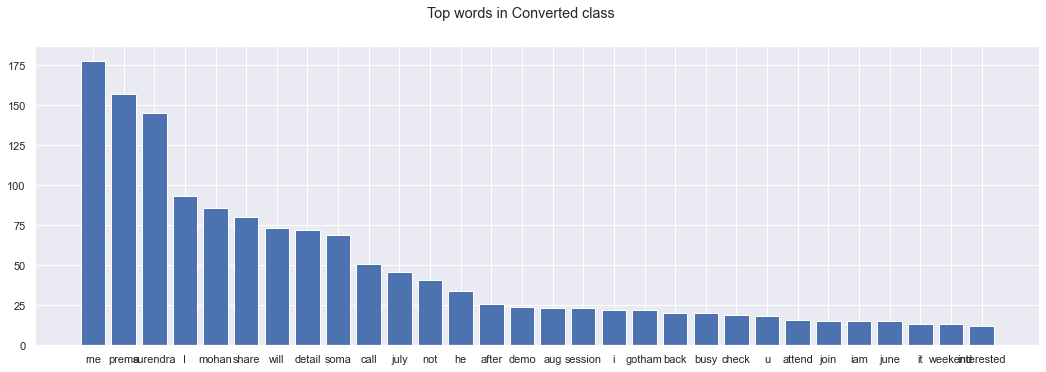

In [9]:
                            ## plotting Top Words for Converted class

corpus = df[df['Status '] == int(1)]['Clean_text'].str.split()
corpus = corpus.values.tolist()
corpus = [word for i in corpus for word in i]
corpus
words , count = [] , []
from collections import Counter
total = Counter(corpus)
top  = total.most_common()
for i,j in top[:30]:
    try:
        if isinstance(int(i), (numbers.Integral, np.integer)):
            pass
    except:
        words.append(i)
        count.append(j)    

fig,(ax1)=plt.subplots(1,1,figsize=(18,5.5))
ax1.bar(words , count )
fig.suptitle('Top words in Converted class')
plt.show()

## Bia-gram exploration

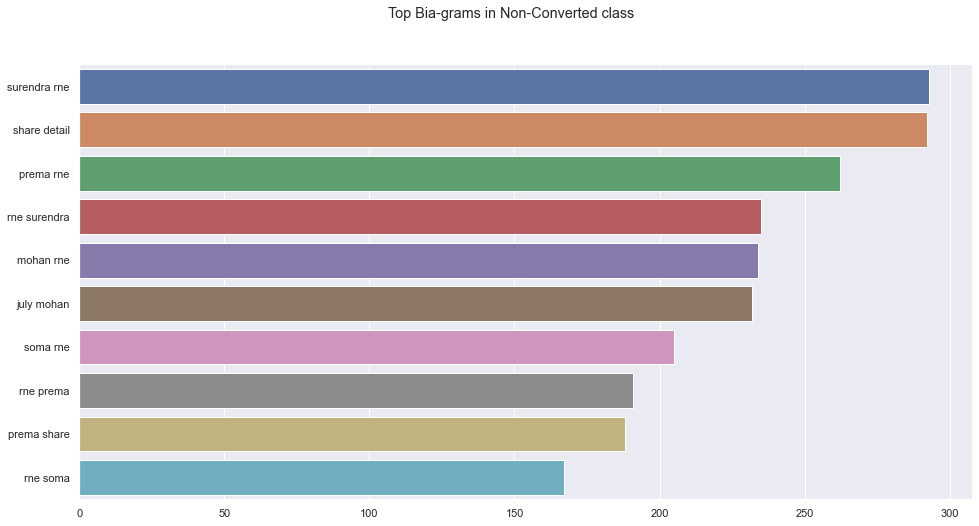

In [10]:
                            ## Bia-gram exploration for Non-Converted class

from nltk.util import ngrams
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

top_n_bigrams = get_top_ngram(df[df['Status '] == int(0)]['Clean_text'],2)
x,y = map(list,zip(*top_n_bigrams))
import seaborn as sns
fig,(ax1)=plt.subplots(1,1,figsize=(16,8))
sns.barplot(x = y , y = x , ax = ax1)
fig.suptitle('Top Bia-grams in Non-Converted class')
plt.show()

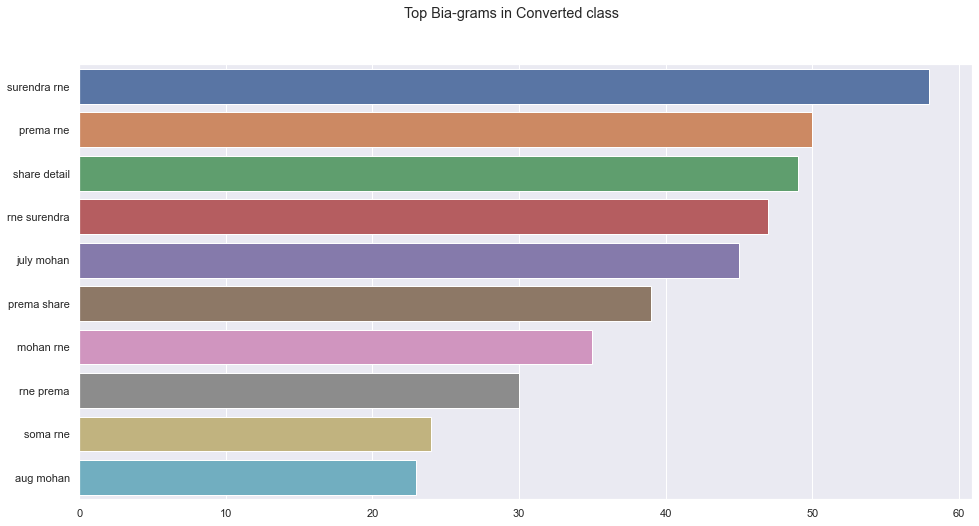

In [11]:
                            ## Bia-gram exploration for Converted class

top_n_bigrams = get_top_ngram(df[df['Status '] == int(1)]['Clean_text'],2)
x,y = map(list,zip(*top_n_bigrams))
import seaborn as sns
fig,(ax1)=plt.subplots(1,1,figsize=(16,8))
sns.barplot(x = y , y = x , ax = ax1)
fig.suptitle('Top Bia-grams in Converted class')
plt.show()

## Tria-gram exploration

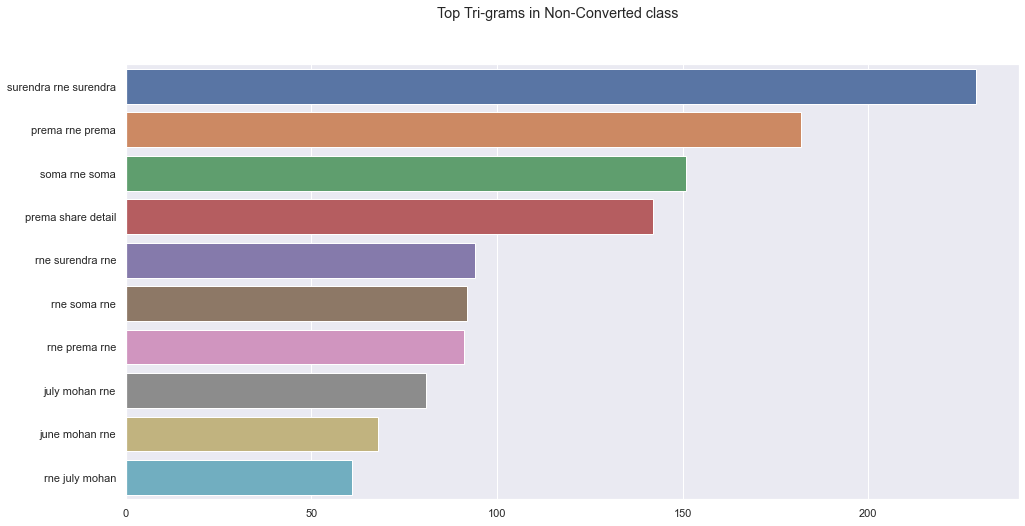

In [12]:
                            ## Tria-gram exploration for Non-Converted class

top_n_trigrams = get_top_ngram(df[df['Status '] == int(0)]['Clean_text'],3)
x,y = map(list,zip(*top_n_trigrams))
import seaborn as sns
fig,(ax1)=plt.subplots(1,1,figsize=(16,8))
sns.barplot(x = y , y = x , ax = ax1)
fig.suptitle('Top Tri-grams in Non-Converted class')
plt.show()

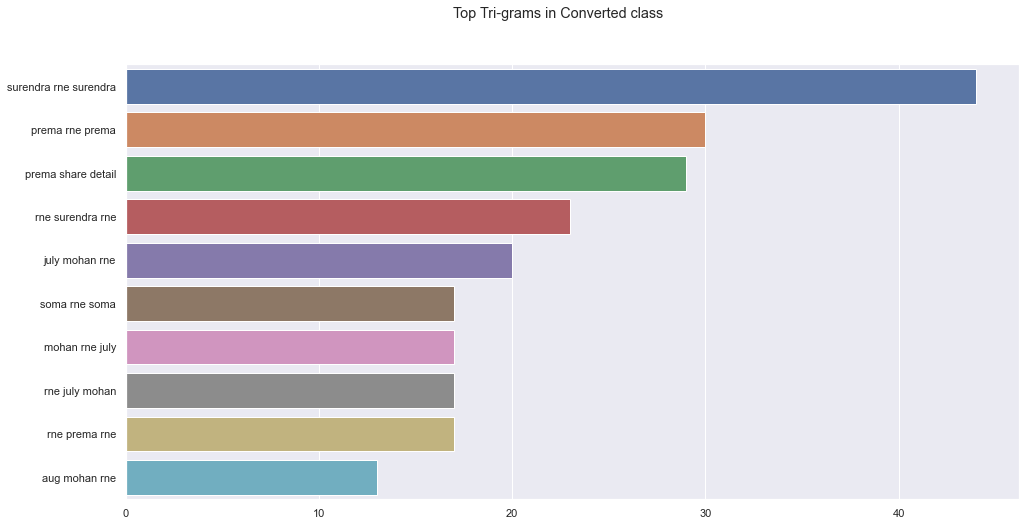

In [13]:
                            ## Tria-gram exploration for Converted class

top_n_trigrams = get_top_ngram(df[df['Status '] == int(1)]['Clean_text'],3)
x,y = map(list,zip(*top_n_trigrams))
import seaborn as sns
fig,(ax1)=plt.subplots(1,1,figsize=(16,8))
sns.barplot(x = y , y = x , ax = ax1)
fig.suptitle('Top Tri-grams in Converted class')
plt.show()

## D. Topic Modeling
    Topic modeling is a process of identifying important topics (a.k.a words) in text data . In our case we have 2 
    categories of customers we can build a topic modeling model to understand the topics present in the data so we'll 
    be selecting 2 major topics along with top words in each topic as our data is of 2 types of customers 1.Converted 
    2.Non-Converted

In [14]:
df.head(3)

,Lead Name,Location,Status,Status information,Clean_text
0,raja,hyderabad,0,"14/8/prema: share me details, available in evng 18/8/prema: postponed the plans for training currently 9/11/prema: not interested now",prema share I detail available eng prema postpone plan train currently prema not interested now
1,anirudh reddy,pune,0,"14/8/prema: cal me tmrw, shared details to email 16/8/prema: share details to email, will check n revert 18/8/prema: received your email, i'm looking for ASQ certification",prema cal I try share detail email prema share detail email will check i revert prema receive email I look as certification
2,sapna dewani,bangalore,1,16|AuG|moHan:rnr,aug mohan rne


In [15]:
corpus = []
def create_corpus(df):
    for text in df['Clean_text']:
        data = text.split()
        corpus.append(data)
        
    return corpus
corpus = create_corpus(df)
corpus[:5]

[['prema',
  'share',
  'I',
  'detail',
  'available',
  'eng',
  'prema',
  'postpone',
  'plan',
  'train',
  'currently',
  'prema',
  'not',
  'interested',
  'now'],
 ['prema',
  'cal',
  'I',
  'try',
  'share',
  'detail',
  'email',
  'prema',
  'share',
  'detail',
  'email',
  'will',
  'check',
  'i',
  'revert',
  'prema',
  'receive',
  'email',
  'I',
  'look',
  'as',
  'certification'],
 ['aug', 'mohan', 'rne'],
 ['surendra',
  'I',
  'want',
  'server',
  'aug',
  'mohan',
  'cal',
  'busy',
  'aug',
  'mohan',
  'reg',
  'server'],
 ['prema',
  'rne',
  'prema',
  'give',
  'info',
  'he',
  'say',
  'he',
  'will',
  'revert',
  'he',
  'prema',
  'plan',
  'next',
  'month',
  'share',
  'detail']]

In [16]:
import gensim
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]
#print(bow_corpus.shape)
bow_corpus[:5]

INFO - 08:39:56: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 08:39:56: built Dictionary(871 unique tokens: ['I', 'available', 'currently', 'detail', 'eng']...) from 956 documents (total 17279 corpus positions)


[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 3),
  (11, 1),
  (12, 1)],
 [(0, 2),
  (3, 2),
  (10, 3),
  (11, 2),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 3),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1)],
 [(24, 1), (25, 1), (26, 1)],
 [(0, 1),
  (14, 1),
  (24, 2),
  (25, 2),
  (27, 1),
  (28, 1),
  (29, 2),
  (30, 1),
  (31, 1)],
 [(3, 1),
  (8, 1),
  (10, 3),
  (11, 1),
  (21, 1),
  (23, 1),
  (26, 1),
  (32, 1),
  (33, 3),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1)]]

In [17]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 2, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

INFO - 08:39:57: using symmetric alpha at 0.5
INFO - 08:39:57: using symmetric eta at 0.5
INFO - 08:39:57: using serial LDA version on this node
INFO - 08:39:57: running online LDA training, 2 topics, 10 passes over the supplied corpus of 956 documents, updating every 4000 documents, evaluating every ~956 documents, iterating 50x with a convergence threshold of 0.001000
INFO - 08:39:57: training LDA model using 2 processes
INFO - 08:39:57: PROGRESS: pass 0, dispatched chunk #0 = documents up to #956/956, outstanding queue size 1
INFO - 08:40:03: topic #0 (0.500): 0.073*"rne" + 0.062*"prema" + 0.056*"soma" + 0.045*"mohan" + 0.031*"share" + 0.028*"detail" + 0.025*"july" + 0.023*"june" + 0.023*"he" + 0.023*"will"
INFO - 08:40:03: topic #1 (0.500): 0.074*"surendra" + 0.069*"rne" + 0.052*"I" + 0.052*"prema" + 0.042*"mohan" + 0.038*"will" + 0.033*"share" + 0.031*"soma" + 0.029*"detail" + 0.028*"not"
INFO - 08:40:03: topic diff=1.926203, rho=1.000000
INFO - 08:40:04: -4.758 per-word bound, 27

[(0,
  '0.086*"mohan" + 0.079*"rne" + 0.074*"soma" + 0.052*"prema" + 0.033*"july" + 0.032*"he" + 0.032*"will" + 0.027*"share" + 0.025*"detail" + 0.022*"june"'),
 (1,
  '0.118*"surendra" + 0.085*"I" + 0.063*"rne" + 0.056*"prema" + 0.038*"share" + 0.037*"will" + 0.033*"detail" + 0.032*"call" + 0.028*"not" + 0.025*"gotham"')]

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

## E. NER
    Understanding named entities in the text like people name , geographic locations , company names etc 
    In our case we can understand by looking at different things like which people , company , location or nouns occurs most frequently in both
    (Converted and Non-Converted) classes. 
    It will helps us to understand what type of named-entities are present most commonly in both classes . 

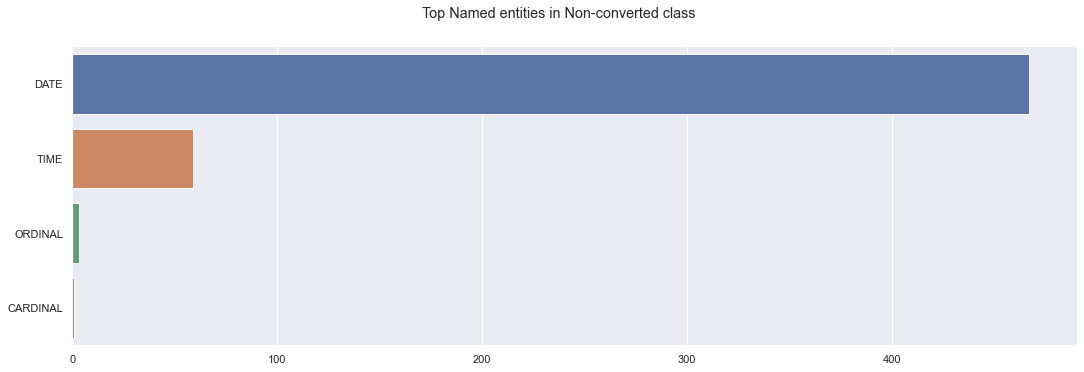

In [18]:
                                        ## Top Named entities for Non-Converted Customers

import warnings
warnings.filterwarnings('ignore')

def NER(text):
    doc = nlp(text)
    ents = [X.label_ for X in doc.ents]
    return ents

ents = df[df['Status '] == int(0)]['Clean_text'].apply(lambda x : NER(x))
ent=[x for sub in ents for x in sub]

counter=Counter(ent)
count=counter.most_common()
x , y = list(map(list,zip(*count)))
fig,(ax1)=plt.subplots(1,1,figsize=(18,5.5))
sns.barplot(x = y , y = x)
fig.suptitle('Top Named entities in Non-converted class')
plt.show()

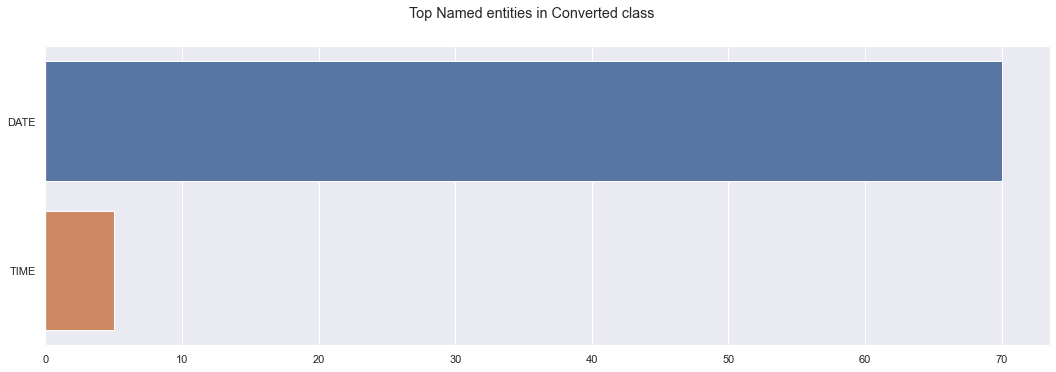

In [19]:
                                        ## Top Named entities for Converted Customers


ents = df[df['Status '] == int(1)]['Clean_text'].apply(lambda x : NER(x))
ent=[x for sub in ents for x in sub]

counter=Counter(ent)
count=counter.most_common()
x , y = list(map(list,zip(*count)))
fig,(ax1)=plt.subplots(1,1,figsize=(18,5.5))
sns.barplot(x = y , y = x)
fig.suptitle('Top Named entities in Converted class')
plt.show()

## NER ( deeper look )
    We've seen that CARDINAL type is mostly occurred in both classes as it represents numbers so we'll ignore it and look for other types.
    

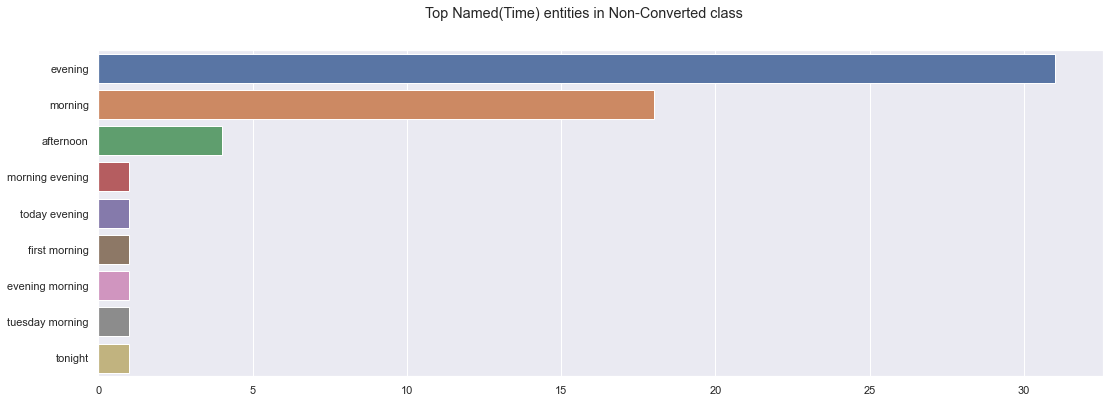

In [20]:
                                        ## Top Named entities for Non-Converted Customers


def ner(text,ent="TIME"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

cardinal=df[df['Status '] == int(0)]['Clean_text'].apply(lambda x: ner(x))
cardinal = [i for x in cardinal for i in x]
counter = Counter(cardinal)

x,y=map(list,zip(*counter.most_common(10)))
fig,(ax1)=plt.subplots(1,1,figsize=(18,6))
sns.barplot(x = y , y = x)
fig.suptitle('Top Named(Time) entities in Non-Converted class')
plt.show()

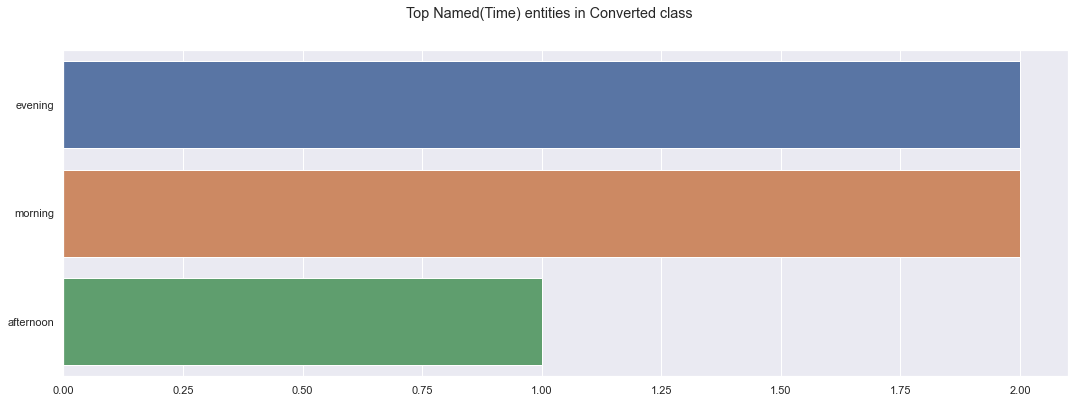

In [21]:
                                        ## Top Named entities for Converted Customers


def ner(text,ent="TIME"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

cardinal=df[df['Status '] == int(1)]['Clean_text'].apply(lambda x: ner(x))
cardinal = [i for x in cardinal for i in x]
counter = Counter(cardinal)

x,y=map(list,zip(*counter.most_common(10)))
fig,(ax1)=plt.subplots(1,1,figsize=(18,6))
sns.barplot(x = y , y = x)
fig.suptitle('Top Named(Time) entities in Converted class')
plt.show()

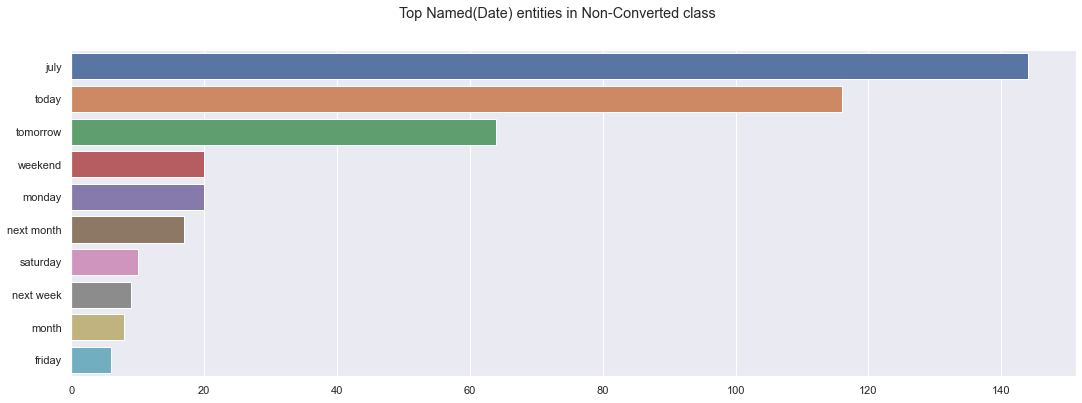

In [22]:
                                        ## Top Named entities for Non-Converted Customers


def ner(text,ent="DATE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

cardinal=df[df['Status '] == int(0)]['Clean_text'].apply(lambda x: ner(x))
cardinal = [i for x in cardinal for i in x]
counter = Counter(cardinal)

x,y=map(list,zip(*counter.most_common(10)))
fig,(ax1)=plt.subplots(1,1,figsize=(18,6))
sns.barplot(x = y , y = x)
fig.suptitle('Top Named(Date) entities in Non-Converted class')
plt.show()

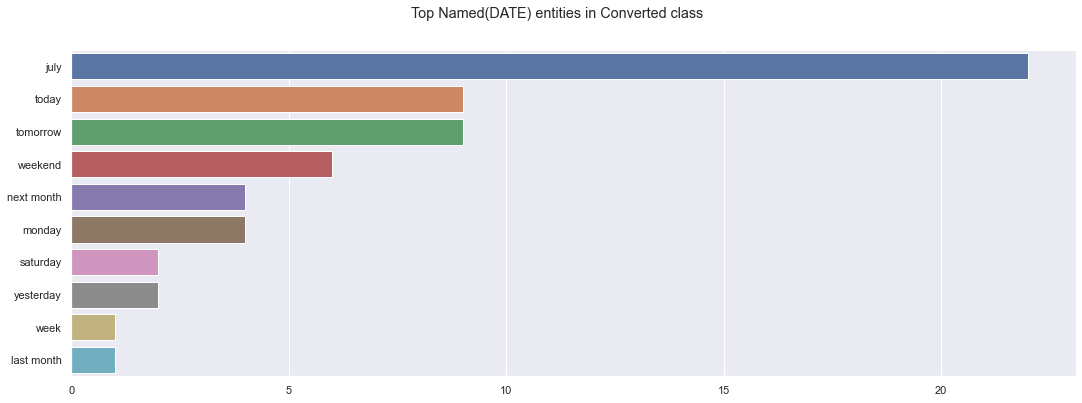

In [23]:
                                        ## Top Named entities for Converted Customers


def ner(text,ent="DATE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

cardinal=df[df['Status '] == int(1)]['Clean_text'].apply(lambda x: ner(x))
cardinal = [i for x in cardinal for i in x]
counter = Counter(cardinal)

x,y=map(list,zip(*counter.most_common(10)))
fig,(ax1)=plt.subplots(1,1,figsize=(18,6))
sns.barplot(x = y , y = x)
fig.suptitle('Top Named(DATE) entities in Converted class')
plt.show()

## F. Word Cloud
    Word Cloud is an amazing tool to present the text in amazing visual way . The way it represnts each word bigger or smaller is because 
    of it's importance/occurence accross the text document. 

In [24]:
## Single text of Non-Converted customers

df_2 = df[df['Status '] == int(0)]
print(df_2.shape)
l1 = ['rnr','surendra','prema','gowtham','mohan','soma']

single_list_df2 = []
for text in df_2['Clean_text']:
    text = [x for x in text.split() if x not in l1]
    single_list_df2.append(text)
#single_list_df2
text_single = [' '.join(text) for text in single_list_df2]
final_text_single1 = ' '.join(text_single)
final_text_single1[0:1000]


(829, 5)


'share I detail available eng postpone plan train currently not interested now cal I try share detail email share detail email will check i revert receive email I look as certification I want server aug cal busy aug reg server rne give info he say he will revert he plan next month share detail I will check demo attend demo I will get back I will think respond not interested ask code aug mail she my tensorflow court aug share rne aug askng code rne share I tableau record session check i revert not reachable rne rotational shift will check detail i confirm rne I will confirm try rne share I detail seminar red call I am om meet cal I later rne seminar weekend share detail is rne I medication will i back after we it be comfortable share I bangalore of address home insist join classroom rne want classroom training I will attend saturday demo I will attend morning match morning be well I will check morning rne rne rne busy rne rne mail share meet call I try share I detail my want demo I will

In [25]:
## Single text of Converted customers

df_3 = df[df['Status '] == int(1)]
print(df_3.shape)
l1 = ['rnr','surendra','prema','gowtham','mohan','soma']

single_list_df3 = []
for text in df_3['Clean_text']:
    text = [x for x in text.split() if x not in l1]
    single_list_df3.append(text)
#single_list_df2
text_single = [' '.join(text) for text in single_list_df3]
final_text_single2 = ' '.join(text_single)
final_text_single2[0:1000]


(127, 5)


'aug rne aug intrested aug intrested my mug aug cal back some other day aug call some other day aug rne aug rne aug rne aug rne aug need demo yrs exp check today demo aug he will try try aug today he will confirm aug i i issue details share she say she will next month rne rne call I after min I will check evening am not interested we number rne I will get back rne switch rne share I demo detail rne not look now rne call not connect rne amar not interested she already join institute rne inquire previously not interested now worng number mail send detail share not reachable will check classroom rne she postpone share detail ask session saturday I hosp may not attend wil try attend sorry I i meet I i unable attend even today I will cal u back rne town aug cal I andy aug rne aug rne aug rne and not now nov shankar not intrested rne detail share will go office tomorrow alrady reg rne detail share not interested delete number share detail rne share detail I want tableau sol language share de

In [26]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


distutils: C:\Users\Ali\.conda\envs\tensor_ali\Include\UNKNOWN
sysconfig: C:\Users\Ali\.conda\envs\tensor_ali\Include
user = False
home = None
root = None
prefix = None
distutils: C:\Users\Ali\.conda\envs\tensor_ali\Include\UNKNOWN
sysconfig: C:\Users\Ali\.conda\envs\tensor_ali\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'C:\Users\Ali\.conda\envs\tensor_ali\python.exe -m pip install --upgrade pip' command.


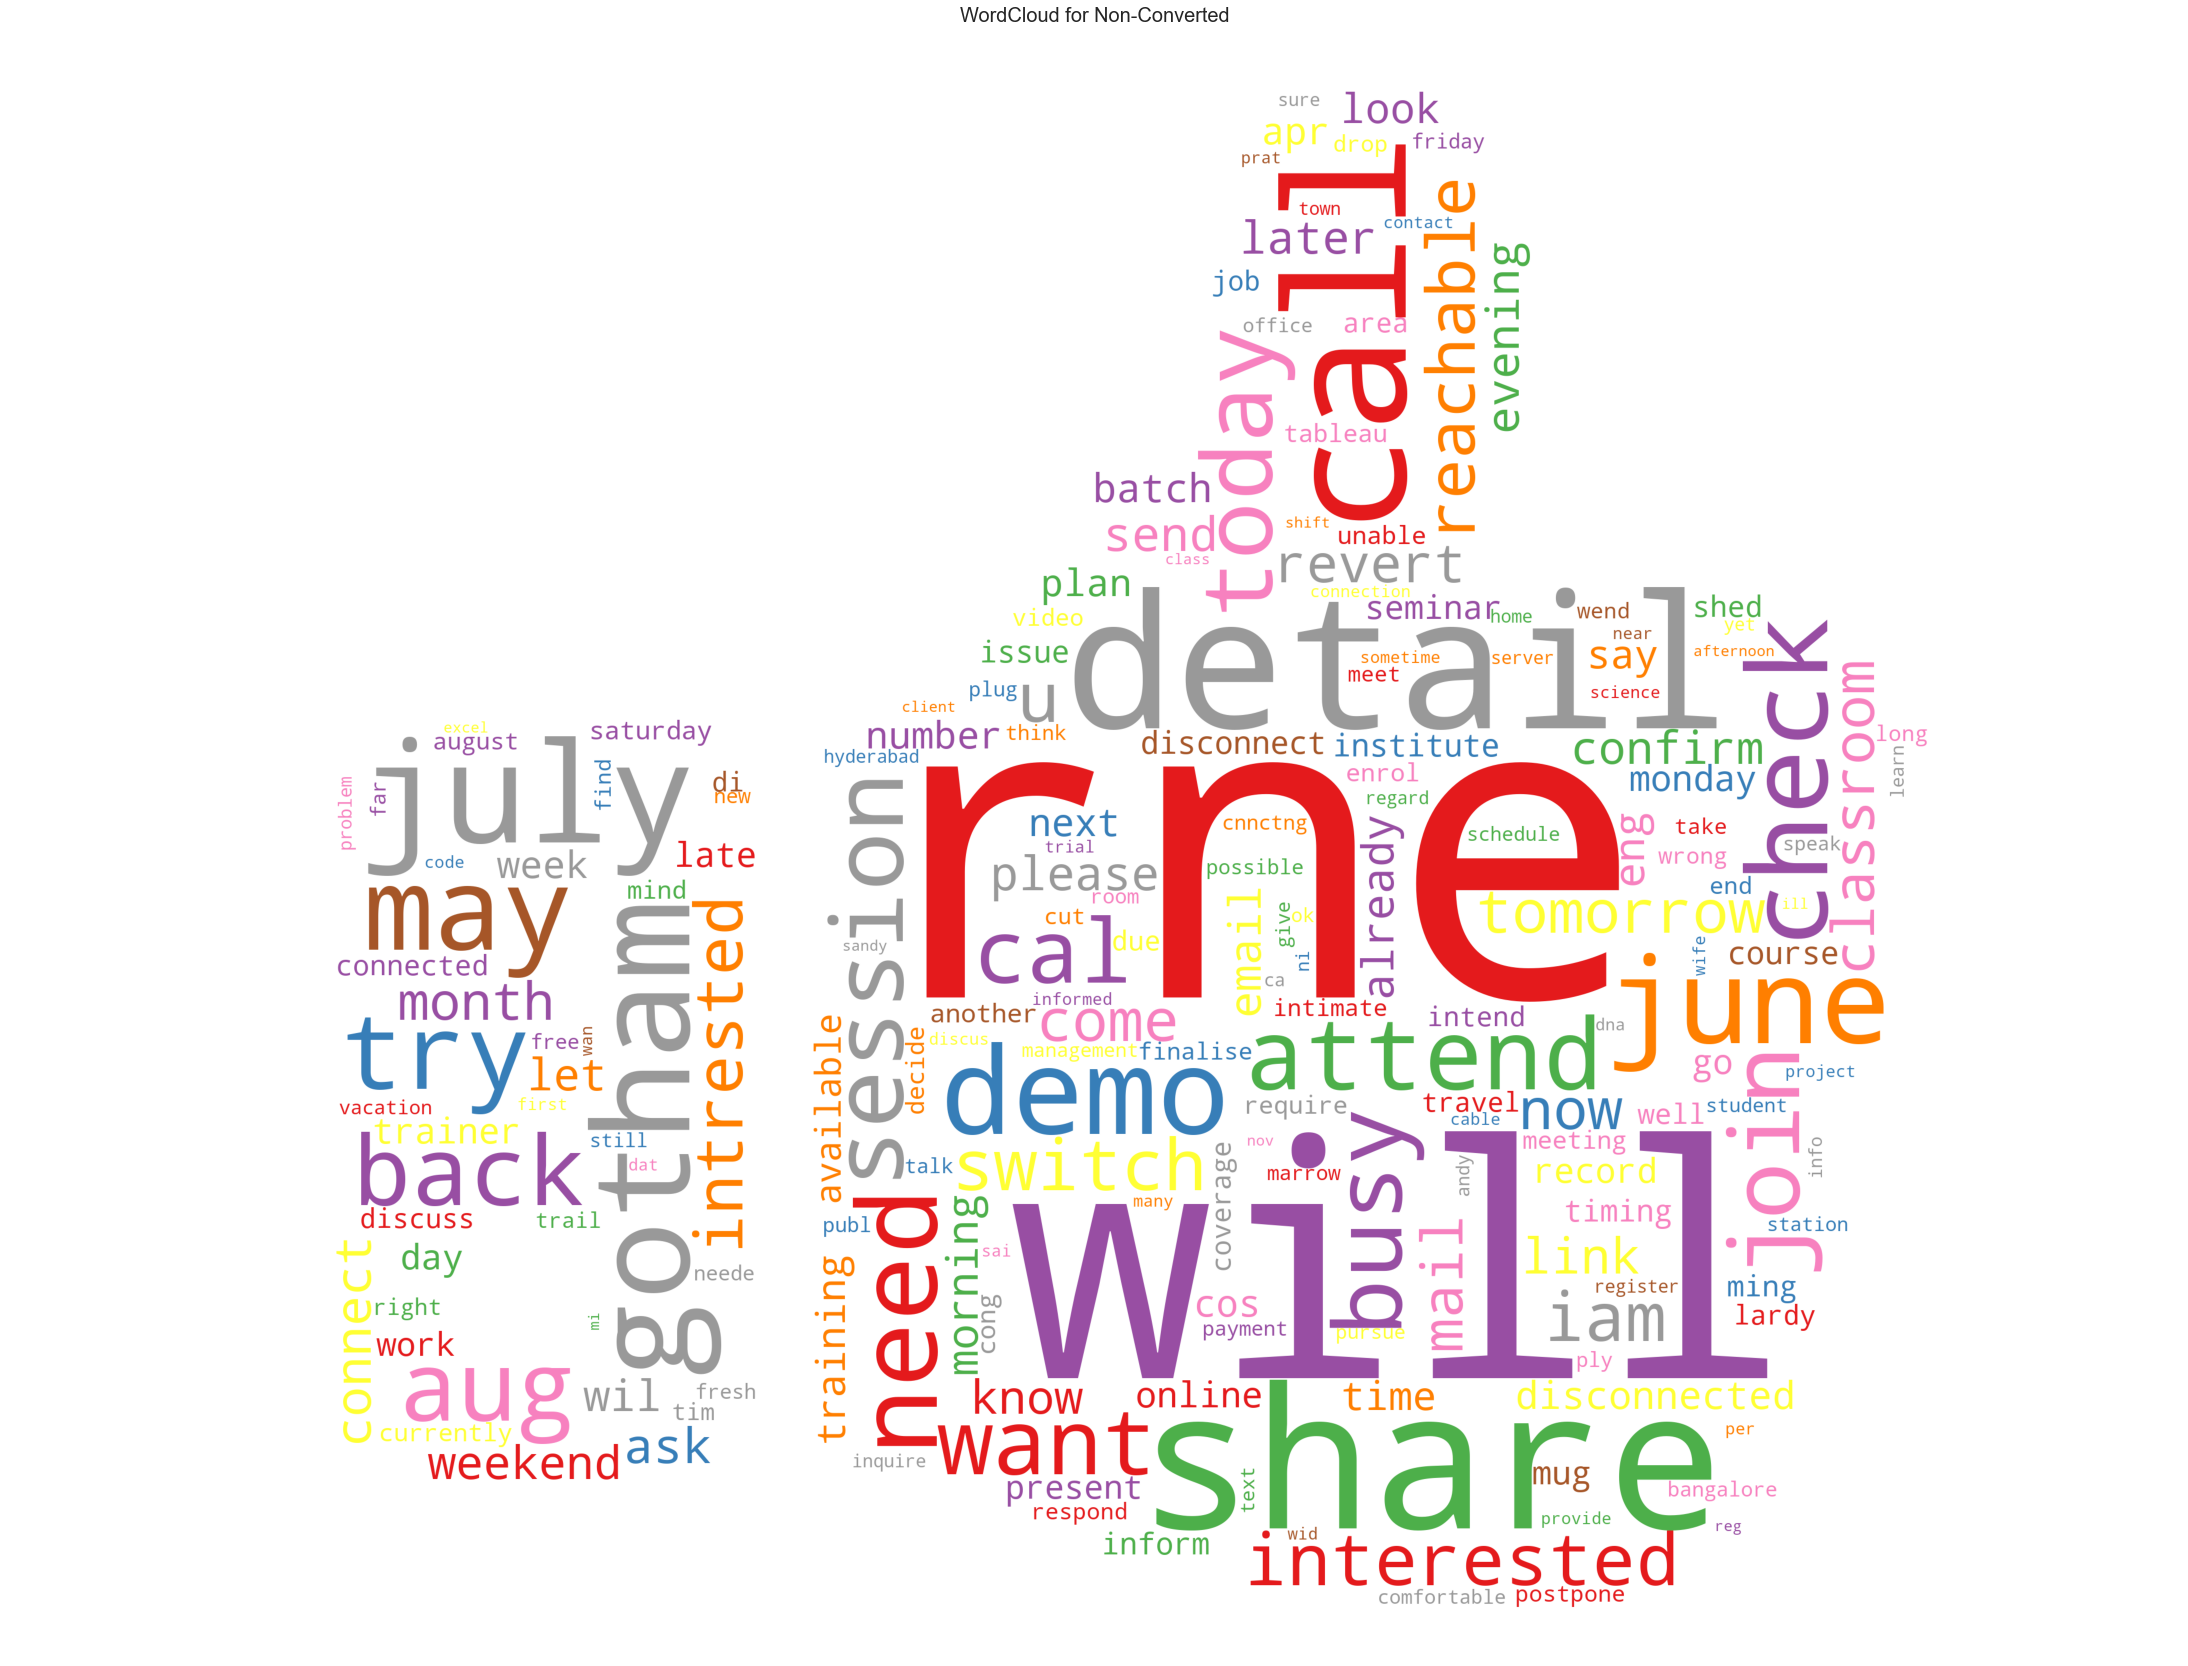

In [27]:
# Word cloud for Non-converted people
def show(cloud,title):
    plt.figure(figsize=(40,30))
    plt.imshow(cloud)
    plt.title(title, fontdict = {'fontsize':20})
    plt.axis('off')

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# Generate word cloud
mask = np.array(Image.open('wo.png'))
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='White', 
                      colormap='Set1', collocations=False, mask=mask ,stopwords=None).generate(final_text_single1)
# Plot
show(wordcloud, 'WordCloud for Non-Converted')

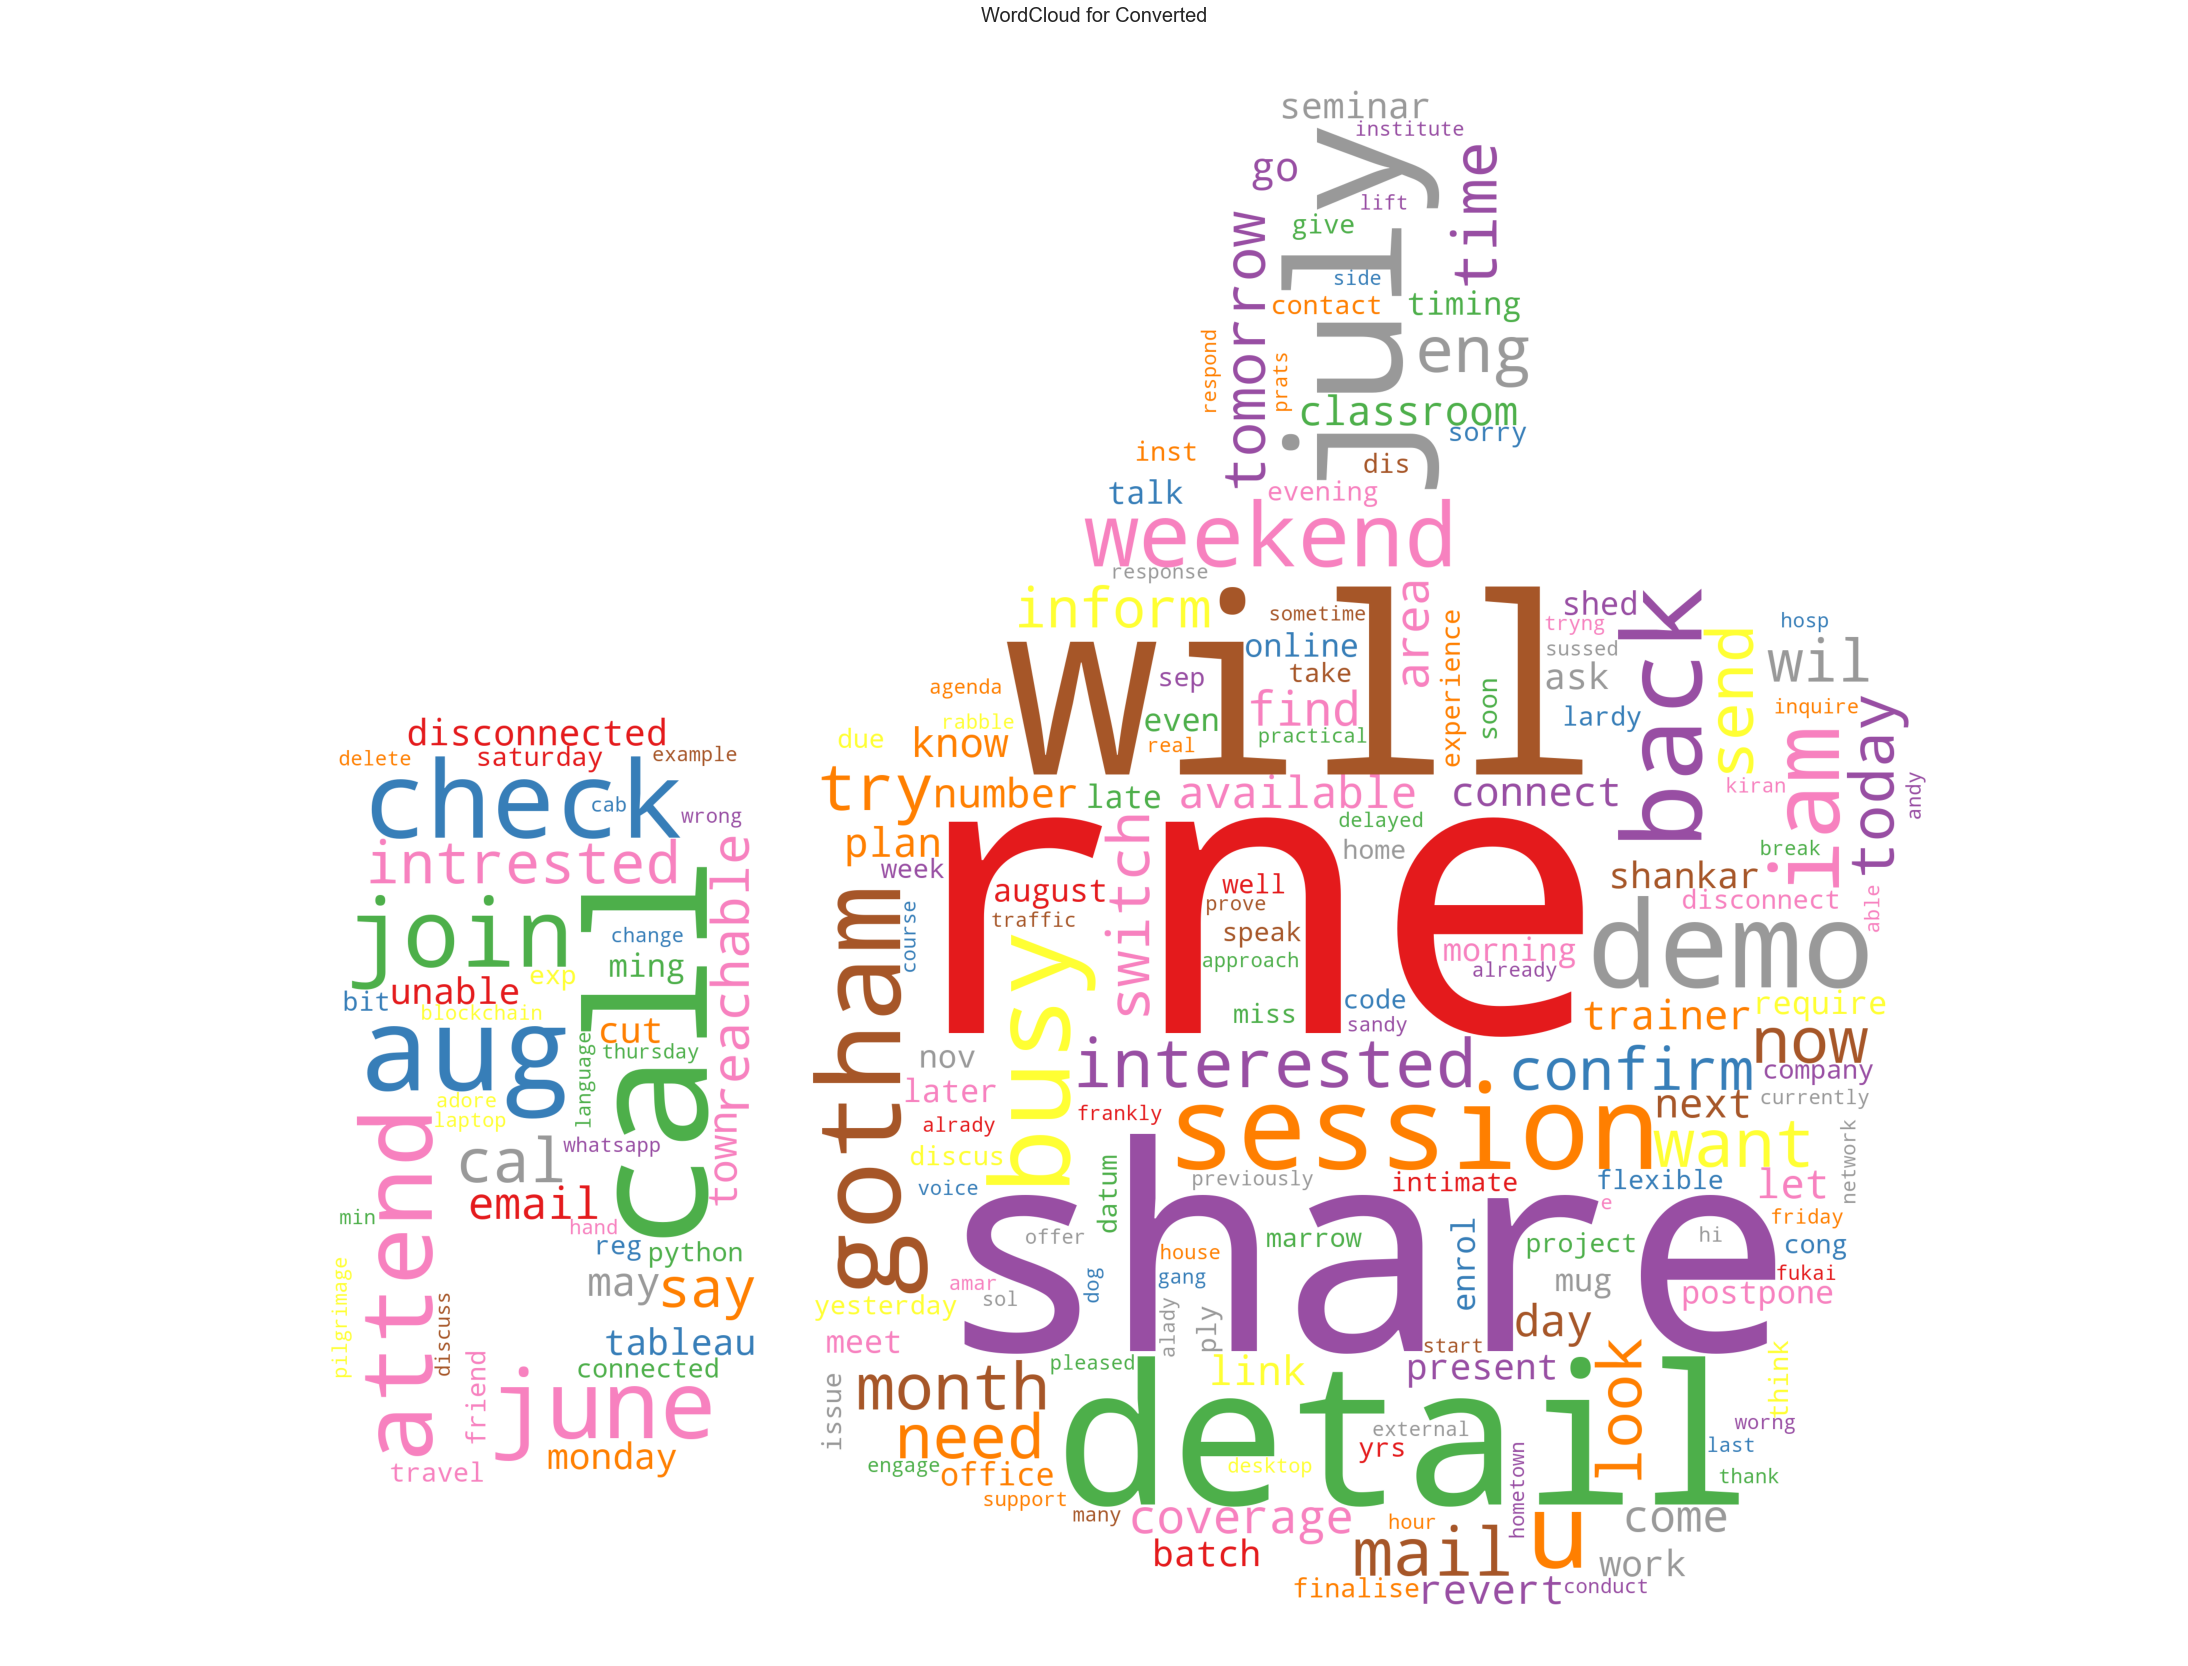

In [28]:
## word cloud for 
mask = np.array(Image.open('wo.png'))
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='White', 
                      colormap='Set1', collocations=False, mask=mask ,stopwords=None).generate(final_text_single2)
# Plot
show(wordcloud, 'WordCloud for Converted')

In [29]:
df.head()

,Lead Name,Location,Status,Status information,Clean_text
0,raja,hyderabad,0,"14/8/prema: share me details, available in evng 18/8/prema: postponed the plans for training currently 9/11/prema: not interested now",prema share I detail available eng prema postpone plan train currently prema not interested now
1,anirudh reddy,pune,0,"14/8/prema: cal me tmrw, shared details to email 16/8/prema: share details to email, will check n revert 18/8/prema: received your email, i'm looking for ASQ certification",prema cal I try share detail email prema share detail email will check i revert prema receive email I look as certification
2,sapna dewani,bangalore,1,16|AuG|moHan:rnr,aug mohan rne
3,suresh,mumbai,0,14/8/17(Surendra):i want only Server 16|AuG|moHan:cal busy 17|AuG|moHan:reg for server,surendra I want server aug mohan cal busy aug mohan reg server
4,akshay shinde,hyderabad,0,"14/8/prema:rnr 16/8/prema: gave info, he said he will revert in 1hr 30/8/prema: planning for next month, share details",prema rne prema give info he say he will revert he prema plan next month share detail


## G. Finding characteristics terms and thier associations
    Scattertext is really usefull tool to explore charactersitics terms associate with dfferent categories/labels . We can quickly get the underlying 
    words to understand how 2 label types are different in terms of the terms assocaiate with them . 

In [30]:
import spacy
import scattertext as st

corpus = st.CorpusFromPandas(df,
                             category_col='Status ',
                             text_col='Clean_text',
                             nlp=nlp).build()
corpus

In [31]:
#print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))
ser1 = pd.Series(corpus.get_scaled_f_scores_vs_background().index[:20])
ser1

0                 rne
1            surendra
2               prema
3               mohan
4             cnnctng
5           intrested
6               lardy
7               neede
8            whatsapp
9              gotham
10           swtchoff
11          reachable
12               soma
13                iam
14               wend
15            comfirm
16             infrom
17    detailstomorrow
18        simplilearn
19          basavaraj
dtype: object

In [32]:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Non-Converted'] = corpus.get_scaled_f_scores(0)
#pprint(list(term_freq_df.sort_values(by='luxry Score', ascending=False).index[:20]))
ser2 = pd.Series(term_freq_df.sort_values(by='Non-Converted', ascending=False).index[:20])
ser2

0          may mohan
1                may
2               need
3         surendra i
4                 am
5                try
6               june
7              today
8            share i
9          mohan not
10        june mohan
11    surendra share
12            gotham
13            i will
14               not
15        will check
16               cal
17          rne soma
18              soma
19         reachable
Name: term, dtype: object

In [33]:
term_freq_df['Converted'] = corpus.get_scaled_f_scores(1)
ser3 = pd.Series(term_freq_df.sort_values(by='Converted', ascending=False).index[:20])
ser3

0          i after
1             some
2         rne july
3          weekend
4              eng
5             time
6     detail prema
7                u
8      prema share
9           inform
10            find
11            look
12       aug mohan
13           after
14    surendra rne
15    rne surendra
16             aug
17             she
18      july mohan
19    share detail
Name: term, dtype: object

In [34]:
term_freq_df.head()

,0 freq,1 freq,Non-Converted,Converted
term,,,,
prema,826,157,0.065857,0.934143
share,514,80,0.088536,0.911464
i,861,115,0.929866,0.070134
detail,458,72,0.087430,0.912570
available,24,6,0.182494,0.817506


In [35]:
dum_df = pd.DataFrame(data = {'Overall_terms': ser1,
                              'Terms_Non-Converted':ser2,
                              'Terms_Converted':ser3})
dum_df

,Overall_terms,Terms_Non-Converted,Terms_Converted
0,rne,may mohan,i after
1,surendra,may,some
2,prema,need,rne july
3,mohan,surendra i,weekend
4,cnnctng,am,eng
5,intrested,try,time
6,lardy,june,detail prema
7,neede,today,u
8,whatsapp,share i,prema share
9,gotham,mohan not,inform


## H. Feature Engineering

#### Topic Modeling for Feature Extraction:
    Well topic modeling is really useful tool/package to extract meaningful features for our model , but in our case based on above topic modeling results 
    we can't use it in this specific scenario . Now as both classes are nearly of same text/tokens so our topics will also be same accross the corpus 
    providing not much unique seperable number of topics of either class . It will poorly allocate topics across different categories as most of records
    are nearlly same . 

In [36]:
df.head()

,Lead Name,Location,Status,Status information,Clean_text
0,raja,hyderabad,0,"14/8/prema: share me details, available in evng 18/8/prema: postponed the plans for training currently 9/11/prema: not interested now",prema share I detail available eng prema postpone plan train currently prema not interested now
1,anirudh reddy,pune,0,"14/8/prema: cal me tmrw, shared details to email 16/8/prema: share details to email, will check n revert 18/8/prema: received your email, i'm looking for ASQ certification",prema cal I try share detail email prema share detail email will check i revert prema receive email I look as certification
2,sapna dewani,bangalore,1,16|AuG|moHan:rnr,aug mohan rne
3,suresh,mumbai,0,14/8/17(Surendra):i want only Server 16|AuG|moHan:cal busy 17|AuG|moHan:reg for server,surendra I want server aug mohan cal busy aug mohan reg server
4,akshay shinde,hyderabad,0,"14/8/prema:rnr 16/8/prema: gave info, he said he will revert in 1hr 30/8/prema: planning for next month, share details",prema rne prema give info he say he will revert he prema plan next month share detail


In [37]:
df['Clean_text'] = df['Clean_text']+' '+df['Lead Name']+' '+df['Location']
df['Clean_text'].head(5)

0                                    prema share I detail available eng prema postpone plan train currently prema not interested now raja hyderabad
1    prema cal I try share detail email prema share detail email will check i revert prema receive email I look as certification anirudh reddy pune
2                                                                                                              aug mohan rne sapna dewani bangalore
3                                                                      surendra I want server aug mohan cal busy aug mohan reg server suresh mumbai
4                                     prema rne prema give info he say he will revert he prema plan next month share detail akshay shinde hyderabad
Name: Clean_text, dtype: object

In [49]:

def TextToTokens(text):
        data = text.split()
        return data
df['Clean_tokens'] = df['Clean_text'].apply(TextToTokens)
df.head()

,Lead Name,Location,Status,Status information,Clean_text,Clean_tokens
0,raja,hyderabad,0,"14/8/prema: share me details, available in evng 18/8/prema: postponed the plans for training currently 9/11/prema: not interested now",prema share I detail available eng prema postpone plan train currently prema not interested now raja hyderabad,"[prema, share, I, detail, available, eng, prema, postpone, plan, train, currently, prema, not, interested, now, raja, hyderabad]"
1,anirudh reddy,pune,0,"14/8/prema: cal me tmrw, shared details to email 16/8/prema: share details to email, will check n revert 18/8/prema: received your email, i'm looking for ASQ certification",prema cal I try share detail email prema share detail email will check i revert prema receive email I look as certification anirudh reddy pune,"[prema, cal, I, try, share, detail, email, prema, share, detail, email, will, check, i, revert, prema, receive, email, I, look, as, certification, anirudh, reddy, pune]"
2,sapna dewani,bangalore,1,16|AuG|moHan:rnr,aug mohan rne sapna dewani bangalore,"[aug, mohan, rne, sapna, dewani, bangalore]"
3,suresh,mumbai,0,14/8/17(Surendra):i want only Server 16|AuG|moHan:cal busy 17|AuG|moHan:reg for server,surendra I want server aug mohan cal busy aug mohan reg server suresh mumbai,"[surendra, I, want, server, aug, mohan, cal, busy, aug, mohan, reg, server, suresh, mumbai]"
4,akshay shinde,hyderabad,0,"14/8/prema:rnr 16/8/prema: gave info, he said he will revert in 1hr 30/8/prema: planning for next month, share details",prema rne prema give info he say he will revert he prema plan next month share detail akshay shinde hyderabad,"[prema, rne, prema, give, info, he, say, he, will, revert, he, prema, plan, next, month, share, detail, akshay, shinde, hyderabad]"


## I. Pickling

In [50]:
TRAIN_PKL_DIR = os.path.join('C:/BEPEC Python Material/NLP project',"processed_data/","Feature_ready.pkl")

In [51]:
pd.to_pickle(df, TRAIN_PKL_DIR)


In [52]:
del(df)